<a href="https://colab.research.google.com/github/CrisGiacomazzi/Indigenous-Health-Access/blob/main/Indigenous_Statistics_Analysis__v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#@title Libraries used

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from statsmodels.stats.contingency_tables import mcnemar
import scipy.stats as stats

In [48]:
# @title Reading datasets

dataset_1 = pd.read_csv('/content/health_literacy_data.csv')
dataset_2 = pd.read_excel('/content/health_literacy_dataset_2.xlsx')
dataset_3 = pd.read_json('/content/health_literacy_dataset_3.json')

In [49]:
# @title Exploring the Datasets

dataset_1.head()

,Patient ID,Indigenous Community,HLQ Before,HLQ After
0,1,Métis,1,2
1,2,Inuit,2,3
2,3,First Nations,3,4
3,4,First Nations,1,2
4,5,Métis,2,3


In [50]:
dataset_1.columns

Index(['Patient ID', 'Indigenous Community', 'HLQ Before', 'HLQ After'], dtype='object')

In [51]:
dataset_1.shape

(260, 4)

In [52]:
# @title Changing the column names
def change_column_name(df):
  df.columns = df.columns.str.replace('HLQ Before', 'HQL_before')
  df.columns = df.columns.str.replace('HLQ After', 'HQL_after')
  return df

dataset_1 = change_column_name(dataset_1)

In [53]:
dataset_1.head()

,Patient ID,Indigenous Community,HQL_before,HQL_after
0,1,Métis,1,2
1,2,Inuit,2,3
2,3,First Nations,3,4
3,4,First Nations,1,2
4,5,Métis,2,3


In [54]:
dataset_2.head()

,Patient ID,Racism_discrimination_before,Racism_discrimination_after,Cultural_healthcare_services_before,Cultural_healthcare_services_after,Traditional_methods_before,Traditional_methods_after
0,1,No,No,No,No,No,Yes
1,2,No,No,No,No,No,No
2,3,No,No,No,No,No,Yes
3,4,No,No,No,No,No,No
4,5,No,No,No,Yes,No,No


In [55]:
dataset_2.shape

(260, 7)

In [56]:
dataset_3.head()

,Patient ID,Number_Vis_ER_before,Number_Vis_ER_after,Cost_ER_before,Cost_ER_after
0,1,3,3,763.61,610.89
1,2,5,4,993.89,795.11
2,3,4,3,472.01,377.61
3,4,4,3,704.25,563.40
4,5,3,3,924.71,739.77


In [57]:
dataset_3.shape

(260, 5)

In [58]:
# @title Join Datasets
# Full Join

# First, merge dataset_1 and dataset_2
merged_dataset = pd.merge(dataset_1, dataset_2, on='Patient ID', how='outer')

# Merge the result with dataset_3
final_dataset = pd.merge(merged_dataset, dataset_3, on='Patient ID', how='outer')

# Display the final merged dataset
final_dataset.head()

,Patient ID,Indigenous Community,HQL_before,HQL_after,Racism_discrimination_before,Racism_discrimination_after,Cultural_healthcare_services_before,Cultural_healthcare_services_after,Traditional_methods_before,Traditional_methods_after,Number_Vis_ER_before,Number_Vis_ER_after,Cost_ER_before,Cost_ER_after
0,1,Métis,1,2,No,No,No,No,No,Yes,3,3,763.61,610.89
1,2,Inuit,2,3,No,No,No,No,No,No,5,4,993.89,795.11
2,3,First Nations,3,4,No,No,No,No,No,Yes,4,3,472.01,377.61
3,4,First Nations,1,2,No,No,No,No,No,No,4,3,704.25,563.40
4,5,Métis,2,3,No,No,No,Yes,No,No,3,3,924.71,739.77


In [59]:
final_dataset.columns

Index(['Patient ID', 'Indigenous Community', 'HQL_before', 'HQL_after',
       'Racism_discrimination_before', 'Racism_discrimination_after',
       'Cultural_healthcare_services_before',
       'Cultural_healthcare_services_after', 'Traditional_methods_before',
       'Traditional_methods_after', 'Number_Vis_ER_before',
       'Number_Vis_ER_after', 'Cost_ER_before', 'Cost_ER_after'],
      dtype='object')

In [60]:
final_dataset.shape

(260, 14)

In [61]:
# @title Cleaning Step

# Count missing values in each column of the final_dataset
missing_values_count = final_dataset.isnull().sum()

# Print the count of missing values for each column
print(missing_values_count)

# Calculate the total number of missing values in the entire dataset
total_missing = missing_values_count.sum()

# Print the total number of missing values
print(f"\nTotal missing values in the final dataset: {total_missing}")

Patient ID                             0
Indigenous Community                   0
HQL_before                             0
HQL_after                              0
Racism_discrimination_before           0
Racism_discrimination_after            0
Cultural_healthcare_services_before    0
Cultural_healthcare_services_after     0
Traditional_methods_before             0
Traditional_methods_after              0
Number_Vis_ER_before                   0
Number_Vis_ER_after                    0
Cost_ER_before                         0
Cost_ER_after                          0
dtype: int64

Total missing values in the final dataset: 0


In [62]:
final_dataset.duplicated().sum()

0

In [63]:
# @title Types of variables

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient ID                           260 non-null    int64  
 1   Indigenous Community                 260 non-null    object 
 2   HQL_before                           260 non-null    int64  
 3   HQL_after                            260 non-null    int64  
 4   Racism_discrimination_before         260 non-null    object 
 5   Racism_discrimination_after          260 non-null    object 
 6   Cultural_healthcare_services_before  260 non-null    object 
 7   Cultural_healthcare_services_after   260 non-null    object 
 8   Traditional_methods_before           260 non-null    object 
 9   Traditional_methods_after            260 non-null    object 
 10  Number_Vis_ER_before                 260 non-null    int64  
 11  Number_Vis_ER_after             

In [64]:
# Converting 'Patient ID' to object type
final_dataset['Patient ID'] = final_dataset['Patient ID'].astype(object)

In [65]:
final_dataset.describe()

,HQL_before,HQL_after,Number_Vis_ER_before,Number_Vis_ER_after,Cost_ER_before,Cost_ER_after
count,260.00000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2.35000,3.169231,3.607692,3.053846,701.606538,561.285500
std,1.07112,0.834937,1.065399,0.689822,186.079250,148.863444
min,1.00000,2.000000,1.000000,1.000000,392.650000,314.120000
25%,1.00000,2.000000,3.000000,3.000000,557.487500,445.987500
50%,2.00000,3.000000,4.000000,3.000000,716.555000,573.245000
75%,3.00000,4.000000,4.000000,3.000000,862.832500,690.270000
max,4.00000,4.000000,6.000000,5.000000,995.680000,796.540000


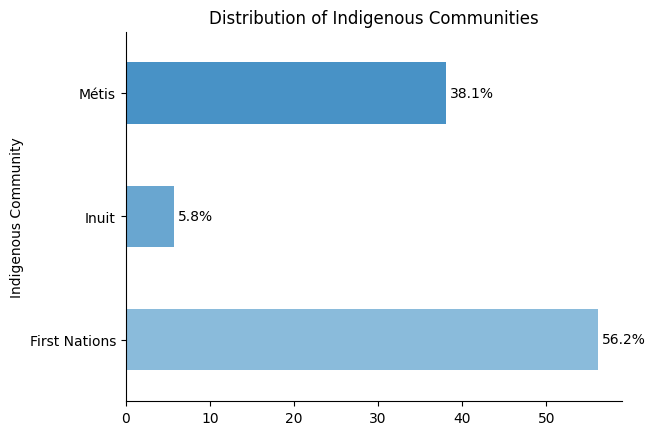

In [66]:
# @title Distribution of Indigenous  Communities in the Program

# Calculating counts and percentages
counts = final_dataset.groupby('Indigenous Community').size()
total = counts.sum()
percentages = counts / total * 100

# Creatin the bar plot
ax = percentages.plot(kind='barh', color=sns.palettes.mpl_palette('Blues_d'))
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels and customize x-axis ticks
plt.title("Distribution of Indigenous Communities")

# Adding percentage labels to bars
for i, v in enumerate(percentages):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.show()

In [67]:
# @title Distributions

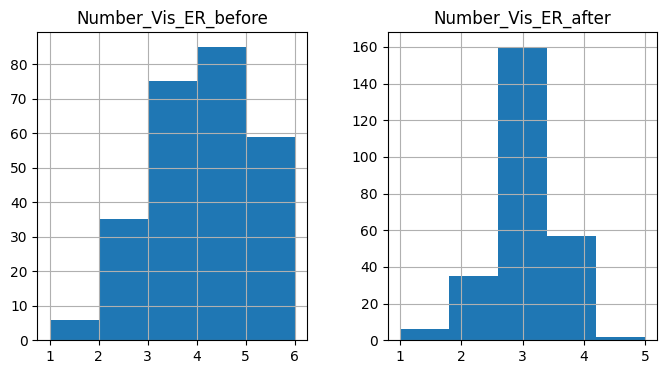

In [68]:
histogram_Number_Vis_ER = final_dataset[['Number_Vis_ER_before', 'Number_Vis_ER_after']].hist(bins=5, figsize=(8, 4))

In [69]:
# @title Perform Shapiro-Wilk test

# H0 (Null Hypothesis): The sample comes from a normally distributed population.
# H1 (Alternative Hypothesis): The sample does not come from a normally distributed population.

statistic_before, p_value_before = shapiro(final_dataset['Number_Vis_ER_before'].dropna())
statistic_after, p_value_after = shapiro(final_dataset['Number_Vis_ER_after'].dropna())

print(f"Shapiro-Wilk Test for Number_Vis_ER_before:")
print(f"Statistic: {statistic_before}")
print(f"P-value: {p_value_before}")

print(f"\nShapiro-Wilk Test for Number_Vis_ER_after:")
print(f"Statistic: {statistic_after}")
print(f"P-value: {p_value_after}")

alpha = 0.05

print("\nInterpretation:")
if p_value_before > alpha:
    print("Number_Vis_ER_before: Sample looks Gaussian (fail to reject H0)")
else:
    print("Number_Vis_ER_before: Sample does not look Gaussian (reject H0)")

if p_value_after > alpha:
    print("Number_Vis_ER_after: Sample looks Gaussian (fail to reject H0)")
else:
    print("Number_Vis_ER_after: Sample does not look Gaussian (reject H0)")  # Corrected

Shapiro-Wilk Test for Number_Vis_ER_before:
Statistic: 0.9087988122027145
P-value: 1.7824719557211252e-11

Shapiro-Wilk Test for Number_Vis_ER_after:
Statistic: 0.8068688412378896
P-value: 2.877479315107992e-17

Interpretation:
Number_Vis_ER_before: Sample does not look Gaussian (reject H0)
Number_Vis_ER_after: Sample does not look Gaussian (reject H0)


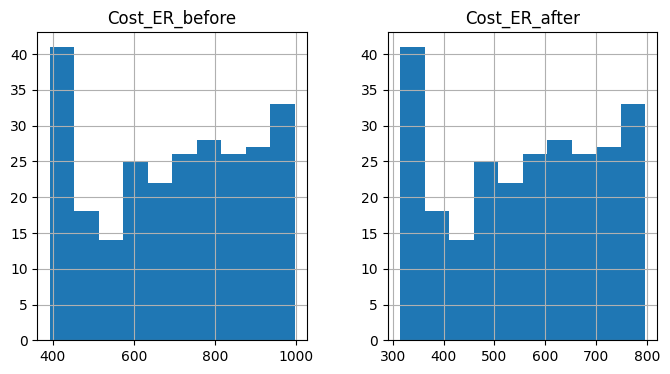

In [70]:
histogram_Cost_ER = final_dataset[['Cost_ER_before', 'Cost_ER_after']].hist(bins=10, figsize=(8, 4))

In [71]:
# @title Skewness and kurtosis

# Calculate skewness and kurtosis
numerical_cols = ['Number_Vis_ER_before', 'Number_Vis_ER_after', 'Cost_ER_before', 'Cost_ER_after']

for col in numerical_cols:
    if col in final_dataset.columns:
        skewness = final_dataset[col].skew()
        kurtosis = final_dataset[col].kurt()
        print(f"Skewness of {col}: {skewness}")
        print(f"Kurtosis of {col}: {kurtosis}")
    else:
        print(f"Column '{col}' not found in the dataset.")


Skewness of Number_Vis_ER_before: -0.264813157238385
Kurtosis of Number_Vis_ER_before: -0.5716257285548156
Skewness of Number_Vis_ER_after: -0.35500484637994123
Kurtosis of Number_Vis_ER_after: 0.8792156465858589
Skewness of Cost_ER_before: -0.13454424080045055
Kurtosis of Cost_ER_before: -1.2252372383002468
Skewness of Cost_ER_after: -0.13454648345182277
Kurtosis of Cost_ER_after: -1.2252337237682667


Both variables assimetrics

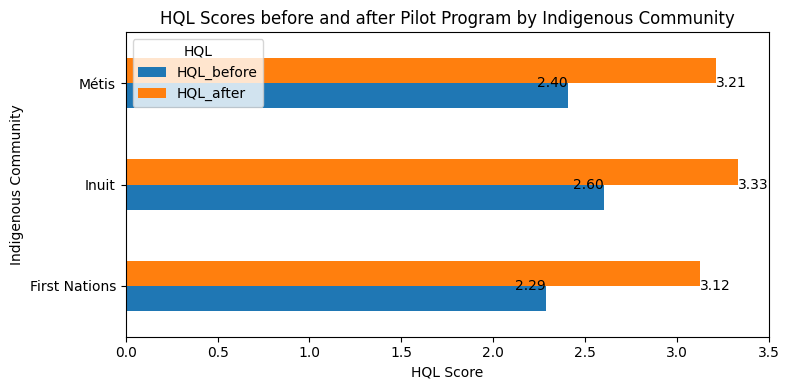

In [72]:
# @title Results before and after

# Group by 'Indigenous Community' and calculate the mean of HQL_before and HQL_after
grouped_df = final_dataset.groupby('Indigenous Community')[['HQL_before', 'HQL_after']].mean()

# Plotting
ax = grouped_df.plot(kind='barh', figsize=(8, 4))

# Adding labels and title
plt.xlabel('HQL Score')
plt.ylabel('Indigenous Community')
plt.title('HQL Scores before and after Pilot Program by Indigenous Community')
plt.legend(title='HQL', bbox_to_anchor=(0, 1), loc='upper left')

# Annotate the bars
for i, (before, after) in enumerate(zip(grouped_df['HQL_before'], grouped_df['HQL_after'])):
    ax.text(before, i, f'{before:.2f}', va='center', ha='right', color='black')
    ax.text(after, i, f'{after:.2f}', va='center', ha='left', color='black')

# Show the plot
plt.tight_layout()
plt.show()

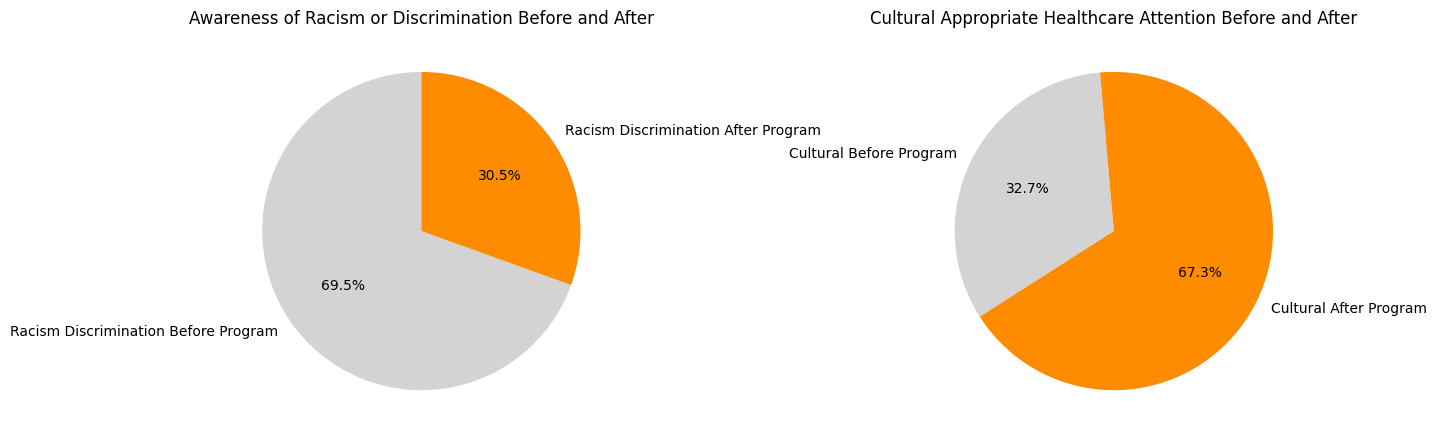

In [73]:
# @title Racism and Cultural service Before and After

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #1 row, 2 columns

# First Pie Chart: Racism Discrimination
yes_before_racism = final_dataset['Racism_discrimination_before'].value_counts().get('Yes', 0)
yes_after_racism = final_dataset['Racism_discrimination_after'].value_counts().get('Yes', 0)

labels_racism = ['Racism Discrimination Before Program', 'Racism Discrimination After Program']
yes_counts_racism = [yes_before_racism, yes_after_racism]

axes[0].pie(yes_counts_racism, labels=labels_racism, autopct='%1.1f%%', startangle=90, colors=['#D3D3D3','#FF8C00'])
axes[0].set_title('Awareness of Racism or Discrimination Before and After')

# Second Pie Chart: Cultural Healthcare Services
yes_before_cultural = final_dataset['Cultural_healthcare_services_before'].value_counts().get('Yes', 0)
yes_after_cultural = final_dataset['Cultural_healthcare_services_after'].value_counts().get('Yes', 0)

labels_cultural = ['Cultural Before Program', 'Cultural After Program']
yes_counts_cultural = [yes_before_cultural, yes_after_cultural]

axes[1].pie(yes_counts_cultural, labels=labels_cultural, autopct='%1.1f%%', startangle=95, colors=['#D3D3D3', '#FF8C00'])
axes[1].set_title('Cultural Appropriate Healthcare Attention Before and After')

# Adjust layout and display
plt.tight_layout()
plt.show()

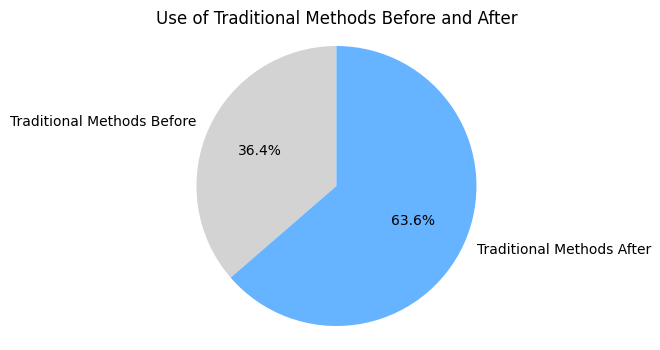

In [74]:
# @title Use of Traditional methods Before and After

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(6, 4))

# Data for the pie chart
labels = ['Traditional Methods Before', 'Traditional Methods After']
yes_before_traditional = final_dataset['Traditional_methods_before'].value_counts().get('Yes', 0)
yes_after_traditional = final_dataset['Traditional_methods_after'].value_counts().get('Yes', 0)
sizes = [yes_before_traditional, yes_after_traditional]
colors = ['#D3D3D3', '#66b3ff'] # Example colors, change as needed

# Create the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
ax.set_title('Use of Traditional Methods Before and After')


# Display the chart
plt.show()


<ipython-input-75-7cd640e4e258>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])


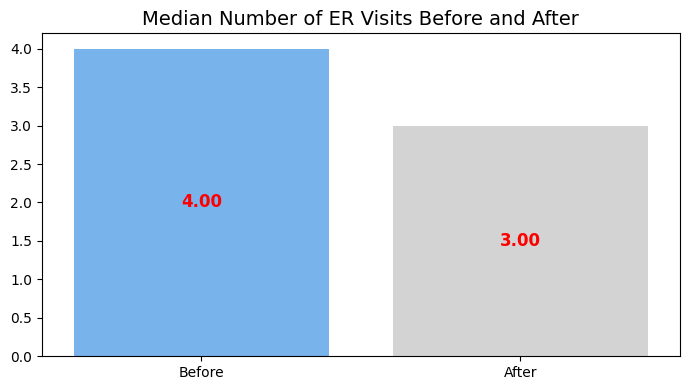

In [75]:
# @title Number of Visits in the Emergency Room

# Calculate the median values
median_before = final_dataset['Number_Vis_ER_before'].median()
median_after = final_dataset['Number_Vis_ER_after'].median()

# Create the bar chart
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])

plt.title('Median Number of ER Visits Before and After', fontsize=14)

# Add labels on top of each bar
for i, value in enumerate([median_before, median_after]):
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='red', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-76-6b16181676fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])


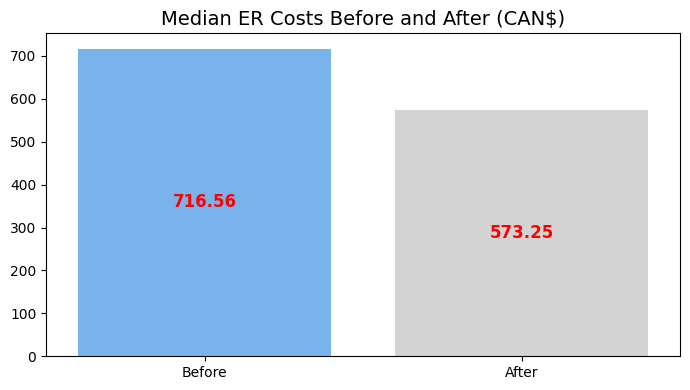

In [76]:
# @title Costs to Emergency Department

# Calculate the median values
median_before = final_dataset['Cost_ER_before'].median()
median_after = final_dataset['Cost_ER_after'].median()

# Create the bar chart
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])

plt.title('Median ER Costs Before and After (CAN$)', fontsize=14)

# Add labels on top of each bar
for i, value in enumerate([median_before, median_after]):
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='red', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
# @title Relations among variables



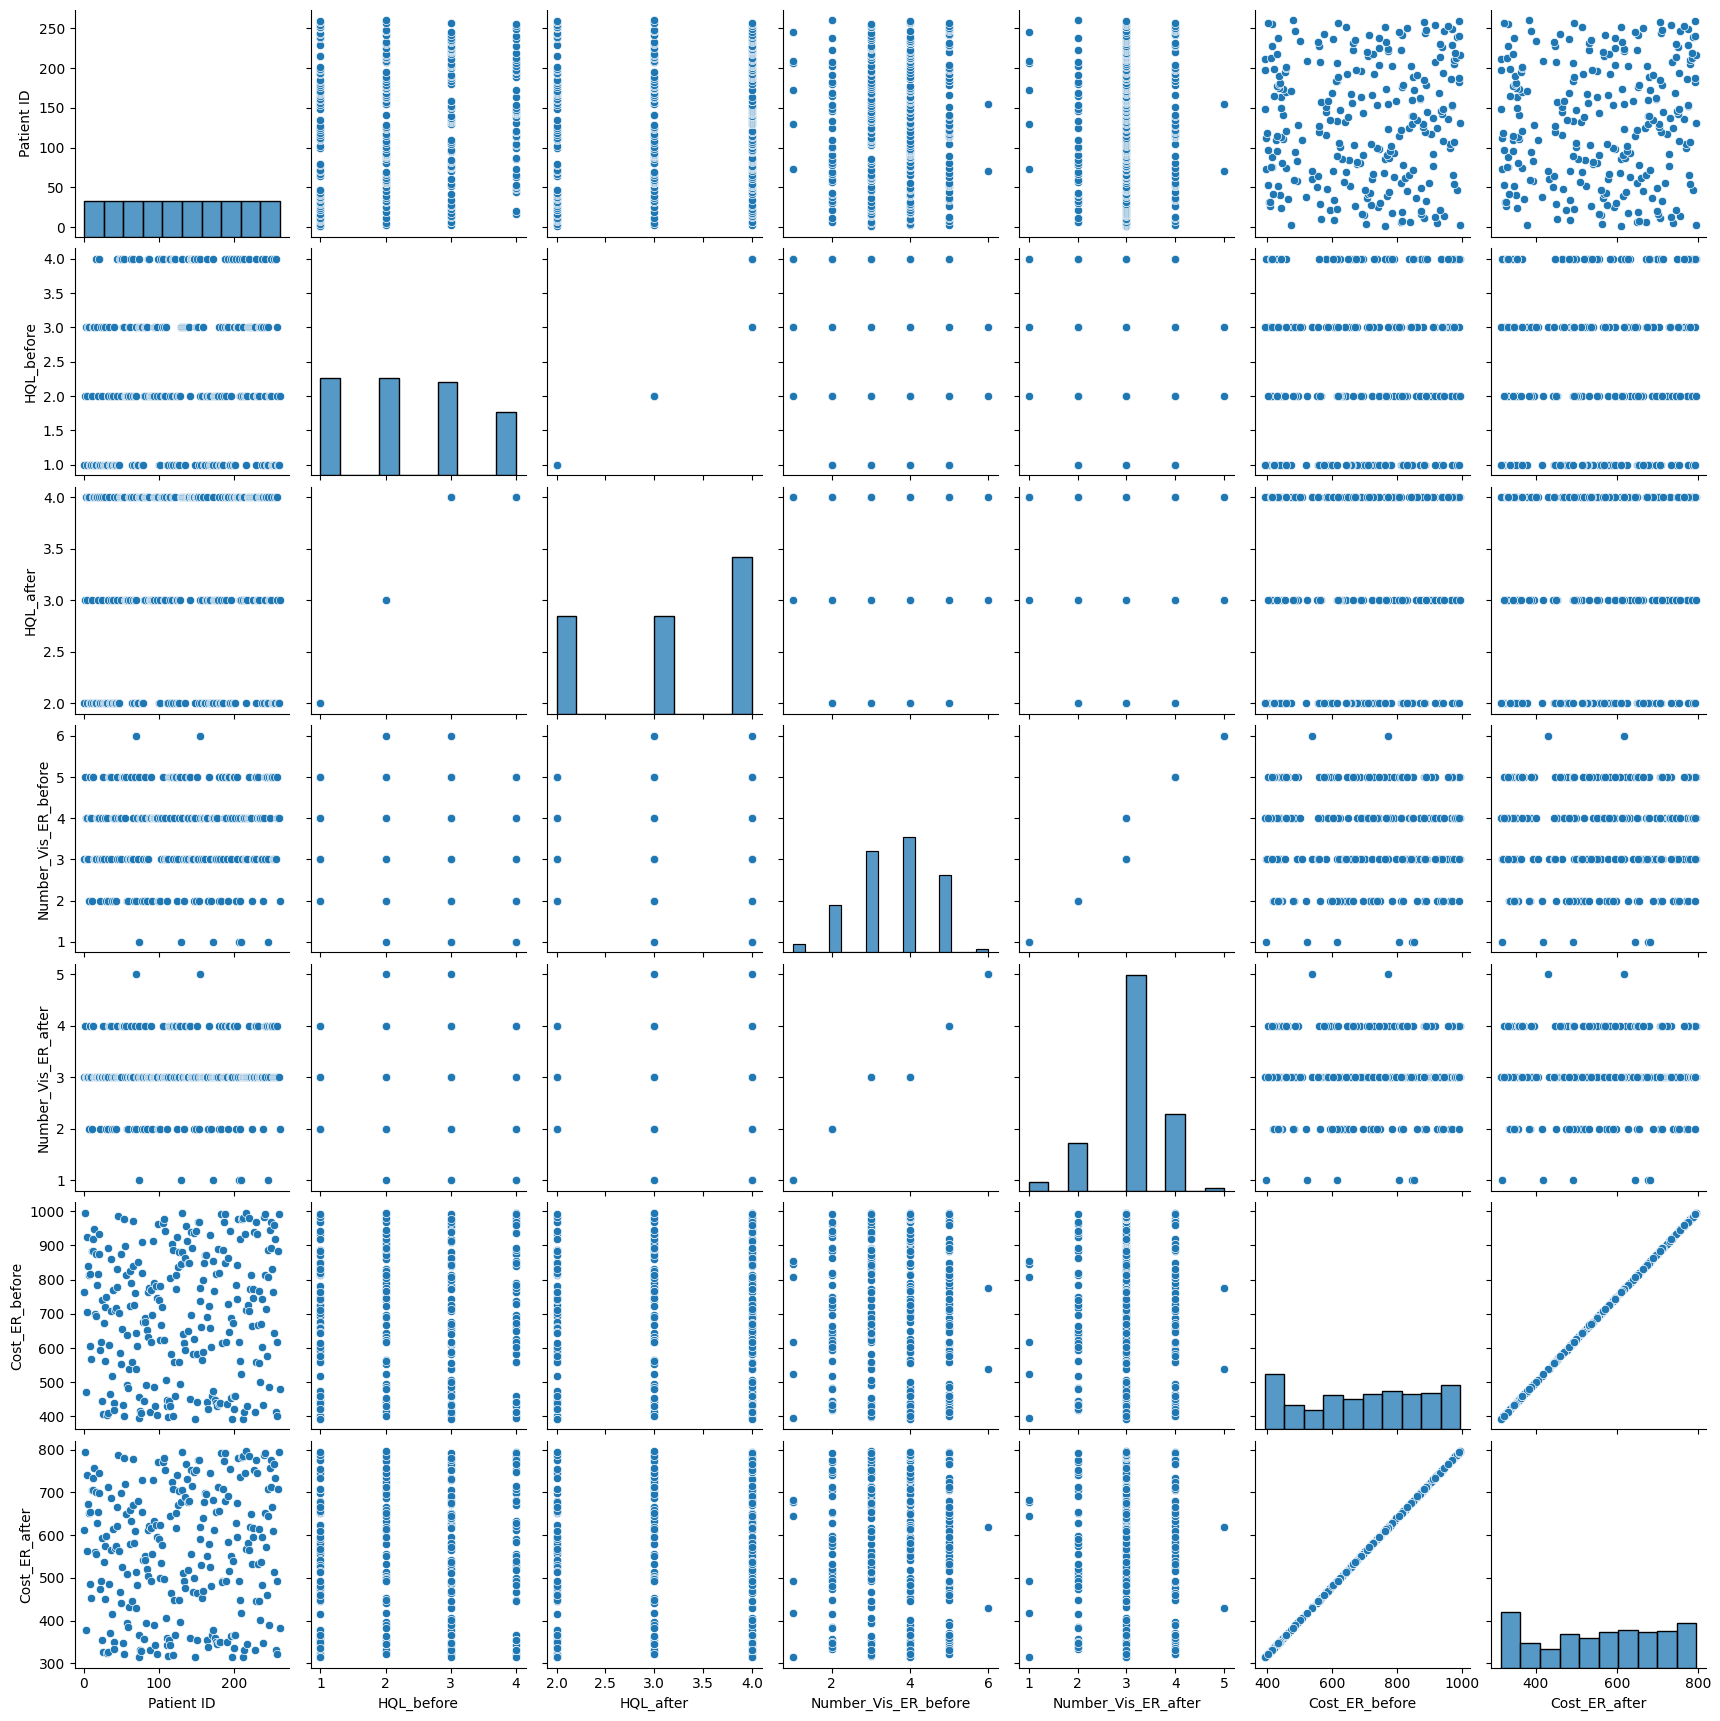

In [78]:
# General visualization

sns.pairplot(final_dataset)
plt.show()

In [79]:
# @title Multivariate Analysis

# Preparing dataset: Drop specified columns
columns_to_drop = ['Patient ID', 'Indigenous Community']
final_dataset = final_dataset.drop(columns=columns_to_drop, errors='ignore')

In [80]:
# Create dummy variables for the specified features
features_to_encode = ['Racism_discrimination_before', 'Racism_discrimination_after',
                      'Cultural_healthcare_services_before',
                      'Cultural_healthcare_services_after', 'Traditional_methods_before',
                      'Traditional_methods_after']

# Use pandas get_dummies to create dummy variables
final_dataset = pd.get_dummies(final_dataset, columns=features_to_encode, drop_first=True)

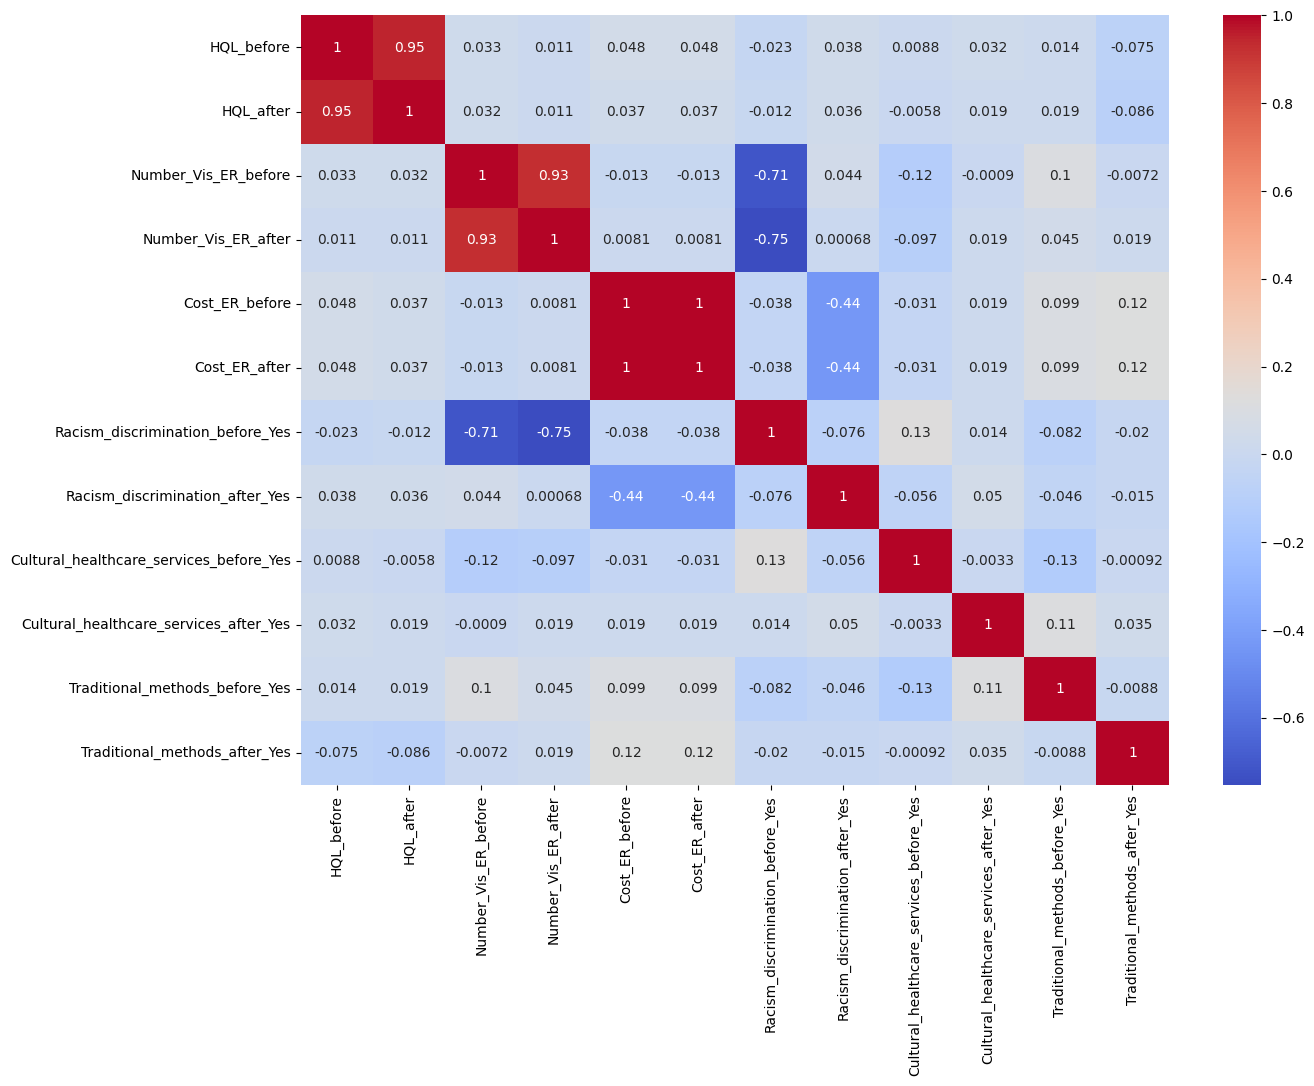

In [81]:
# Correlation Matrix

plt.figure(figsize=(14, 10))
correlation_matrix = final_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

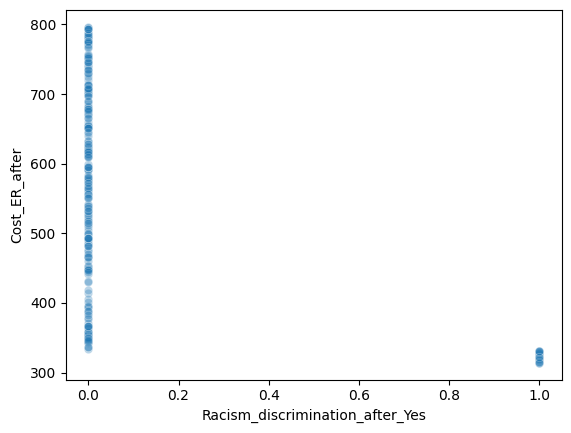

In [82]:
# @title Bivariate Analysis

# Racism x Costs

sns.scatterplot(x='Racism_discrimination_after_Yes', y='Cost_ER_after', data=final_dataset, alpha=0.3)
plt.show()

*   Costs are inversaly related with racism




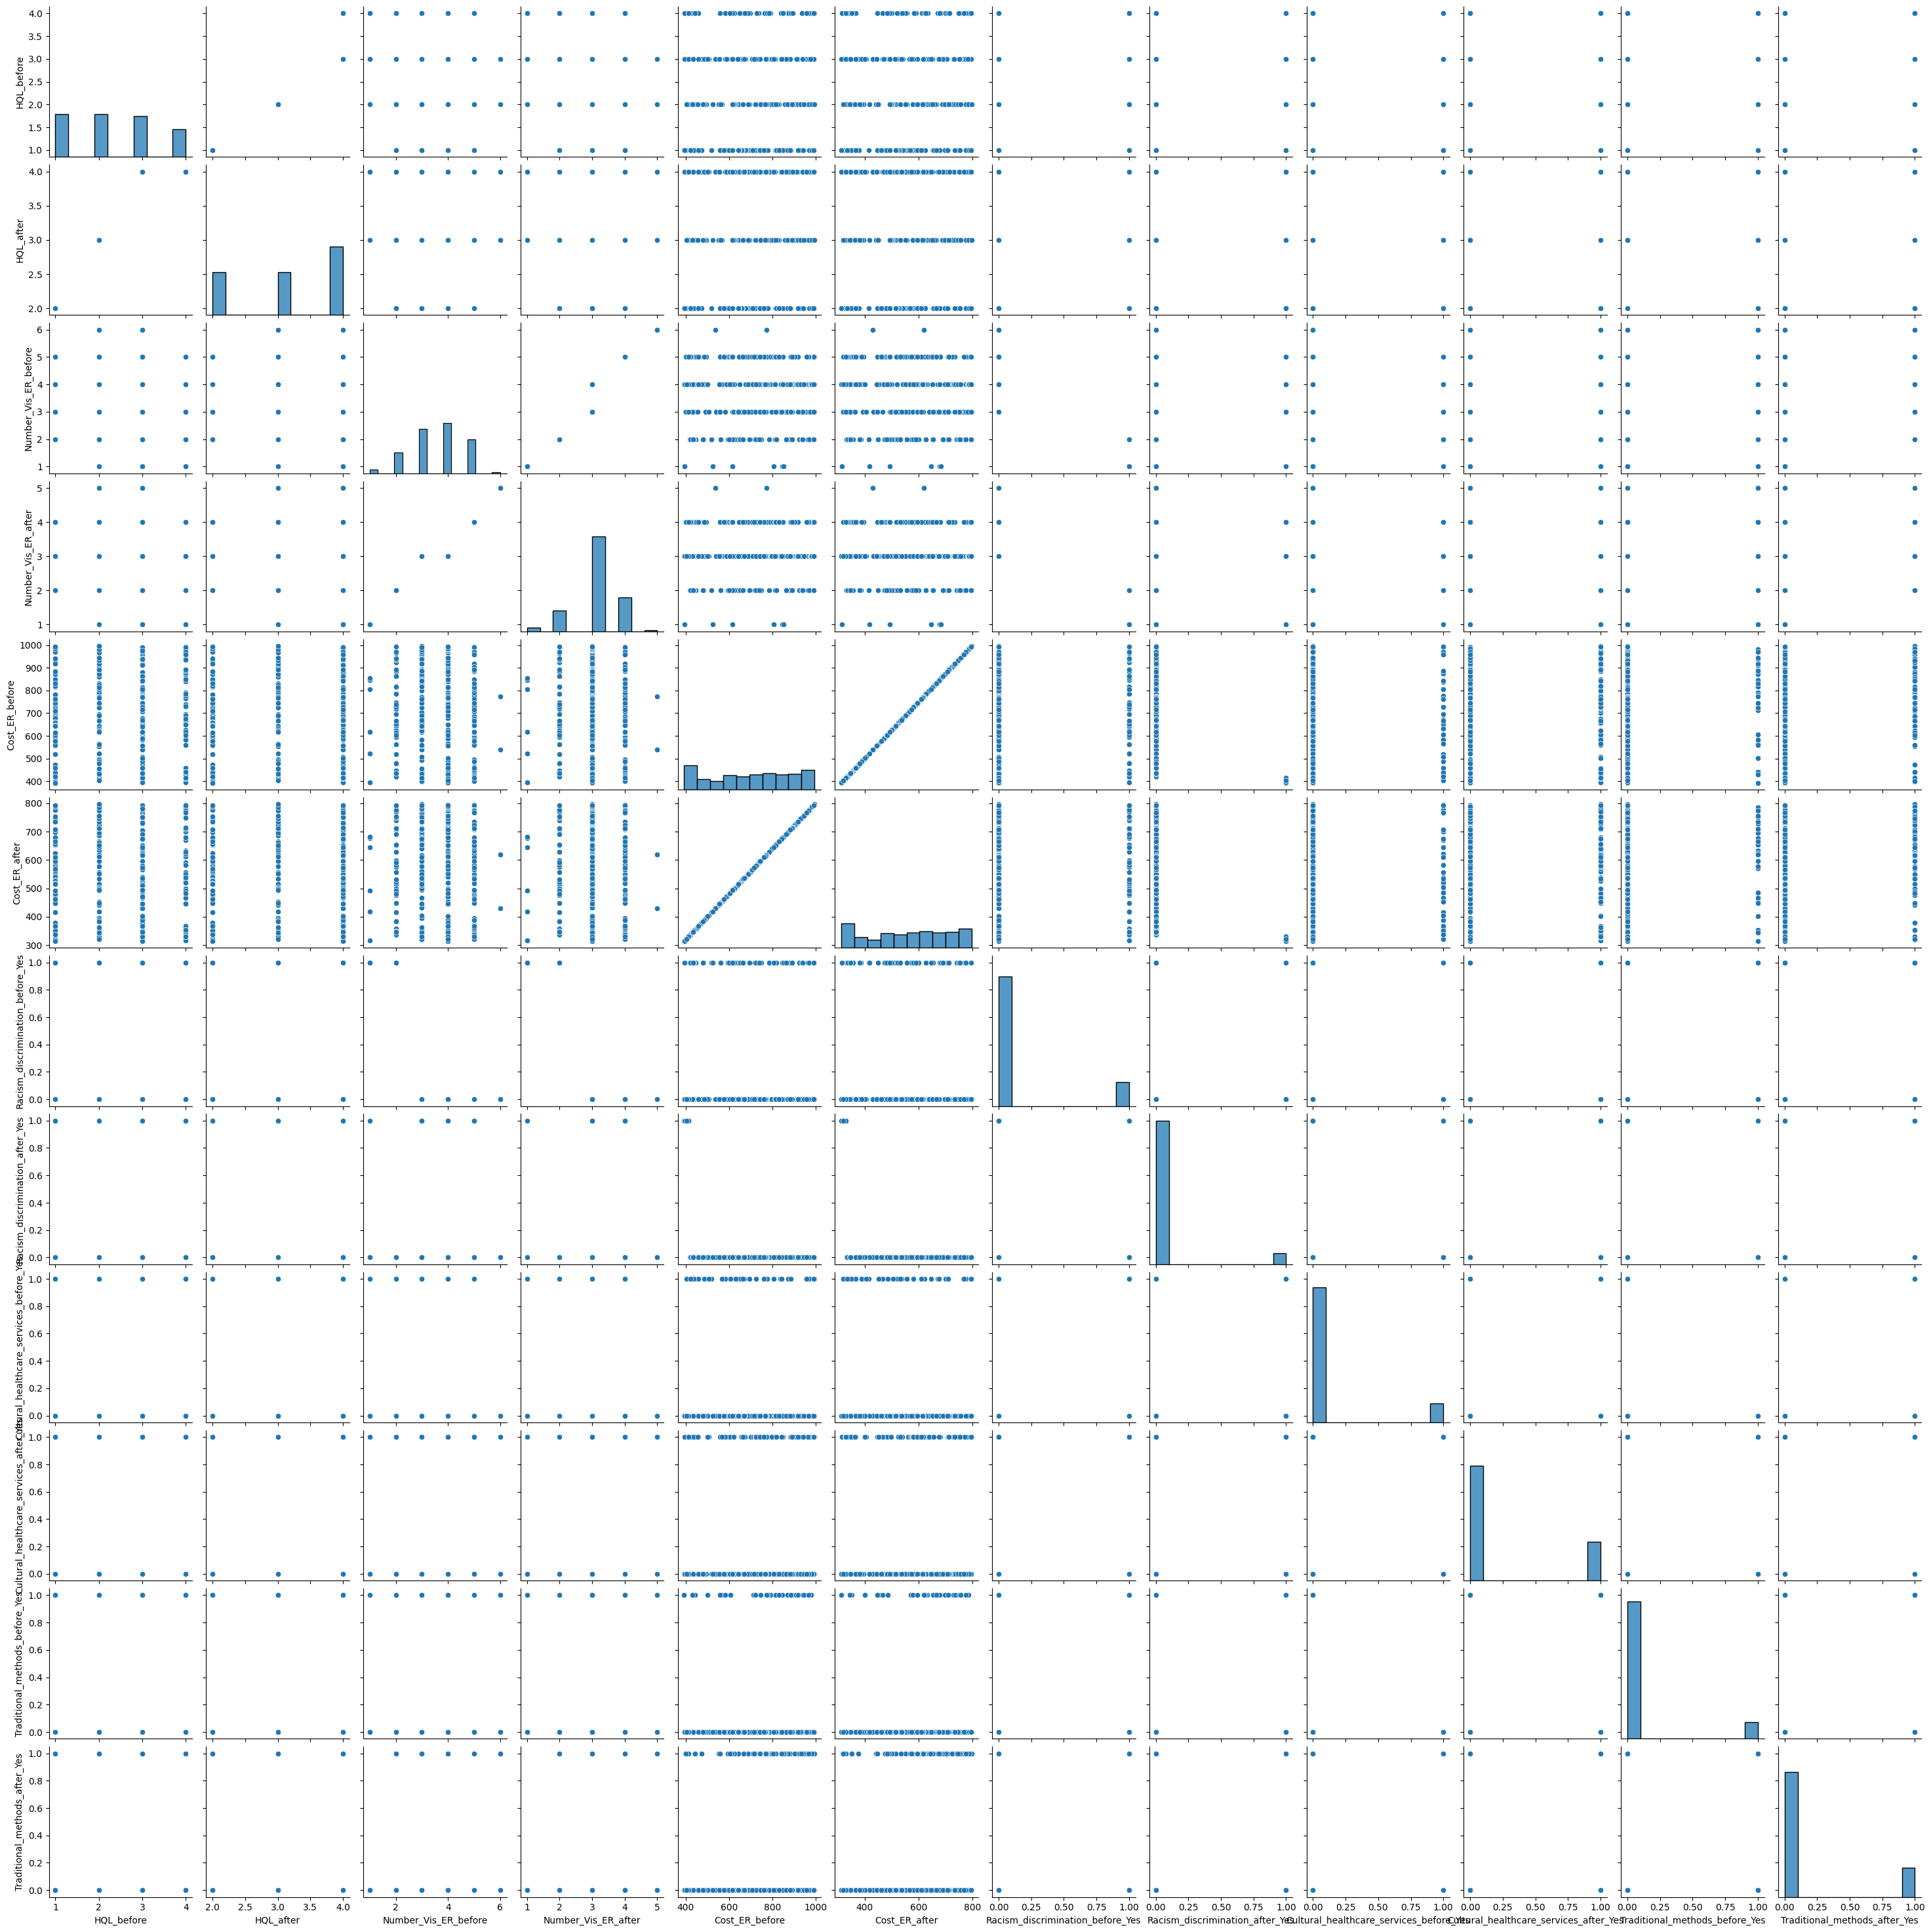

In [83]:
#Adding variables after dummy
sns.pairplot(final_dataset)
plt.show()

# Statistical Tests

In [84]:
# Performing the Wilcoxon signed-rank test

## HQL
statistic, p_value = wilcoxon(final_dataset['HQL_before'], final_dataset['HQL_after'])

# Print the results
print(f"Wilcoxon Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between HQL_before and HQL_after.")
else:
    print("There is no statistically significant difference between HQL_before and HQL_after.")

Wilcoxon Statistic: 0.0000
P-value: 3.0435e-48
There is a statistically significant difference between HQL_before and HQL_after.


In [85]:
## Number of ER visits before and after
statistic, p_value = wilcoxon(final_dataset['Number_Vis_ER_before'], final_dataset['Number_Vis_ER_after'])

# Print the results
print(f"Wilcoxon Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between ER visits before and after.")
else:
    print("There is no statistically significant difference between ER visits before and after.")

Wilcoxon Statistic: 0.0000
P-value: 3.5530e-33
There is a statistically significant difference between ER visits before and after.


In [86]:
## Costs
statistic, p_value = wilcoxon(final_dataset['Cost_ER_before'], final_dataset['Cost_ER_after'])

# Print the results
print(f"Wilcoxon Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between ER costs before and after.")
else:
    print("There is no statistically significant difference between ER costs before and after.")

Wilcoxon Statistic: 0.0000
P-value: 2.1346e-44
There is a statistically significant difference between ER costs before and after.


In [87]:
# Performing the McNemar signed-rank test

## Racism
# Create a contingency table
contingency_table = pd.crosstab(final_dataset['Racism_discrimination_before_Yes'],
                                final_dataset['Racism_discrimination_after_Yes'])

# Perform McNemar test
result = mcnemar(contingency_table, exact=False)

# Print the results
print(f"McNemar's test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

# Interpret the results
if result.pvalue < 0.05:
    print("There is a significant difference between the before and after conditions.")
else:
    print("There is no significant difference between the before and after conditions.")

McNemar's test statistic: 8.491228070175438
p-value: 0.0035686284369333987
There is a significant difference between the before and after conditions.


In [88]:
## Culture
# Create a contingency table
contingency_table = pd.crosstab(final_dataset['Cultural_healthcare_services_before_Yes'],
                                final_dataset['Cultural_healthcare_services_after_Yes'])

# Perform McNemar test
result = mcnemar(contingency_table, exact=False)

# Print the results
print(f"McNemar's test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

# Interpret the results
if result.pvalue < 0.05:
    print("There is a significant difference between the before and after conditions.")
else:
    print("There is no significant difference between the before and after conditions.")

McNemar's test statistic: 13.28048780487805
p-value: 0.00026818270839020305
There is a significant difference between the before and after conditions.


In [89]:
## Tradition
# Create a contingency table
contingency_table = pd.crosstab(final_dataset['Traditional_methods_before_Yes'],
                                final_dataset['Traditional_methods_after_Yes'])

# Perform McNemar test
result = mcnemar(contingency_table, exact=False)

# Print the results
print(f"McNemar's test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

# Interpret the results
if result.pvalue < 0.05:
    print("There is a significant difference between the before and after conditions.")
else:
    print("There is no significant difference between the before and after conditions.")

McNemar's test statistic: 5.970149253731344
p-value: 0.014550049247421962
There is a significant difference between the before and after conditions.


In [97]:
## Spearman HQL and dicothomic variables
# Create a new column for HQL change (HQL_after - HQL_before)
final_dataset["HQL_change"] = final_dataset["HQL_after"] - final_dataset["HQL_before"]

# List of dichotomous variables - Updated to reflect dummy column names
dichotomous_vars = [
    "Racism_discrimination_before_Yes",  # Changed to the dummy variable name
    "Traditional_methods_before_Yes",  # Changed to the dummy variable name
    "Cultural_healthcare_services_before_Yes"  # Changed to the dummy variable name
]

# Loop through each dichotomous variable and compute Spearman’s Rank Correlation
for var in dichotomous_vars:
    spearman_corr, p_value = stats.spearmanr(final_dataset["HQL_change"], final_dataset[var])

    # Print the results
    print(f"Spearman’s Rank Correlation: HQL_change vs. {var}")
    print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print("-" * 50)

    # Interpretation
    if p_value < 0.05:
        print(f"🔴 Significant correlation found between HQL_change and {var} (p < 0.05).")
    else:
        print(f"🟢 No significant correlation between HQL_change and {var} (p ≥ 0.05).")
    print("=" * 50, "\n")

Spearman’s Rank Correlation: HQL_change vs. Racism_discrimination_before_Yes
Spearman Correlation Coefficient: 0.0387
P-Value: 0.5343
--------------------------------------------------
🟢 No significant correlation between HQL_change and Racism_discrimination_before_Yes (p ≥ 0.05).

Spearman’s Rank Correlation: HQL_change vs. Traditional_methods_before_Yes
Spearman Correlation Coefficient: 0.0020
P-Value: 0.9746
--------------------------------------------------
🟢 No significant correlation between HQL_change and Traditional_methods_before_Yes (p ≥ 0.05).

Spearman’s Rank Correlation: HQL_change vs. Cultural_healthcare_services_before_Yes
Spearman Correlation Coefficient: -0.0370
P-Value: 0.5528
--------------------------------------------------
🟢 No significant correlation between HQL_change and Cultural_healthcare_services_before_Yes (p ≥ 0.05).



In [98]:
# Create a new column for HQL change (HQL_after - HQL_before)
final_dataset["HQL_change"] = final_dataset["HQL_after"] - final_dataset["HQL_before"]

# List of dichotomous variables - Updated to reflect dummy column names
dichotomous_vars = [
    "Racism_discrimination_after_Yes",  # Changed to the dummy variable name
    "Traditional_methods_after_Yes",  # Changed to the dummy variable name
    "Cultural_healthcare_services_after_Yes"  # Changed to the dummy variable name
]

# Loop through each dichotomous variable and compute Spearman’s Rank Correlation
for var in dichotomous_vars:
    spearman_corr, p_value = stats.spearmanr(final_dataset["HQL_change"], final_dataset[var])

    # Print the results
    print(f"Spearman’s Rank Correlation: HQL_change vs. {var}")
    print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print("-" * 50)

    # Interpretation
    if p_value < 0.05:
        print(f"🔴 Significant correlation found between HQL_change and {var} (p < 0.05).")
    else:
        print(f"🟢 No significant correlation between HQL_change and {var} (p ≥ 0.05).")
    print("=" * 50, "\n")

Spearman’s Rank Correlation: HQL_change vs. Racism_discrimination_after_Yes
Spearman Correlation Coefficient: -0.0294
P-Value: 0.6373
--------------------------------------------------
🟢 No significant correlation between HQL_change and Racism_discrimination_after_Yes (p ≥ 0.05).

Spearman’s Rank Correlation: HQL_change vs. Traditional_methods_after_Yes
Spearman Correlation Coefficient: 0.0219
P-Value: 0.7250
--------------------------------------------------
🟢 No significant correlation between HQL_change and Traditional_methods_after_Yes (p ≥ 0.05).

Spearman’s Rank Correlation: HQL_change vs. Cultural_healthcare_services_after_Yes
Spearman Correlation Coefficient: -0.0475
P-Value: 0.4455
--------------------------------------------------
🟢 No significant correlation between HQL_change and Cultural_healthcare_services_after_Yes (p ≥ 0.05).



In [91]:
# @title New Dataset

#final_dataset.to_csv('cleaned_dataset.csv', index=False)